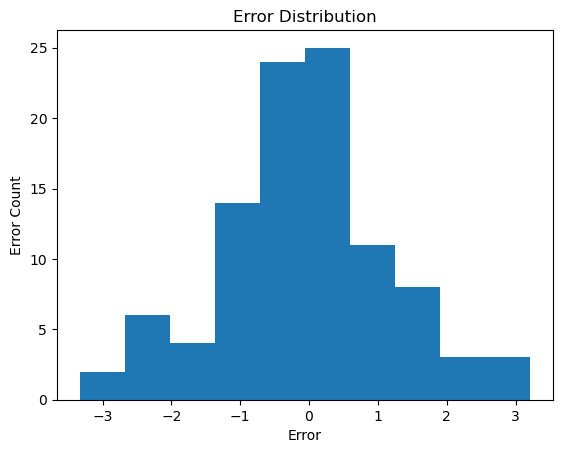

In [31]:
import numpy as np
import cvxpy as cp

T = 100
n = 5

X = np.random.randn(T, n)
y = np.random.randn(T)

w = cp.Variable(n)

objective = cp.Minimize((1/T) * (cp.quad_form(w, X.T @ X) - 2 * (X.T @ y) @ w + y.T @ y))

constraints = [cp.sum(w) == 1, w >= 0]

problem = cp.Problem(objective, constraints)

problem.solve()

w_star = w.value

y_pred = X @ w_star

errors = y_pred - y

plt.hist(errors)

plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Error Count')
plt.show()
